In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
from loaders import load_all_videos

%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
vids = load_all_videos()
vids

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,is_GB,is_US
0,0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,NaN,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,True,False
1,1,3s1rvMFUweQ,17.14.11,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,NaN,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs â¦Ready f...,True,False
2,2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,NaN,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,True,False
3,3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,NaN,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,True,False
4,4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,NaN,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73364,40943,1PhPYr_9zRY,18.14.06,BTS Plays With Puppies While Answering Fan Que...,BuzzFeed Celeb,NaN,2018-05-18T16:39:29.000Z,"BuzzFeed|""BuzzFeedVideo""|""Puppy Interview""|""pu...",8259128,645888,4052,62610,https://i.ytimg.com/vi/1PhPYr_9zRY/default.jpg,False,False,False,"BTS with the PPS, the puppies. These adorable ...",False,True
73365,40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,NaN,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,False,True
73366,40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,NaN,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,False,True
73367,40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,NaN,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,False,True


# Titles

In [3]:
titles = vids.groupby('video_id').first()[['title']]
titles

,title
video_id,
--uXQQ0h-yQ,Paul McCartney - Pipes of Peace
-0CMnp02rNY,Mindy Kaling's Daughter Had the Perfect Reacti...
-0NYY8cqdiQ,Megan Mullally Didn't Notice the Interesting P...
-1Hm41N0dUs,Cast of Avengers: Infinity War Draws Their Cha...
-1yT-K3c6YI,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...
...,...
zxUwbflE1SY,100 People Hold Their Breath for as Long as Th...
zxjv0lo8bU8,MARCELO's son ENZO shows off his skills in the...
zxwfDlhJIpw,kanye west / charlamagne interview


## Hand-crafted features

In [33]:
import re
from nltk.tokenize.casual import casual_tokenize

def num_chars(text):
    return len(text)

def num_words(text):
    return len(casual_tokenize(text))

def num_uppercase_words(text):
    pattern = r'\b[A-Z]+\b'
    return len(re.findall(pattern, text))

def num_repeated_letters(text):
    pattern = r'\b\w*(\w)\1{2,}\w*\b'
    return len(re.findall(pattern, text))

def num_question_marks(text):
    return text.count('?')

def num_exclamation_marks(text):
    return text.count('!')

def num_periods(text):
    return text.count('.')

def num_numbers(text):
    pattern = '\d+'
    return len(re.findall(pattern, text))

def num_hashtags(text):
    pattern = '#\w+'
    return len(re.findall(pattern, text))

features = [
    num_chars, num_words, num_uppercase_words,
    num_question_marks, num_exclamation_marks, num_periods,
    num_numbers, num_hashtags
]

for func in features:
    titles[func.__name__] = titles['title'].apply(func)

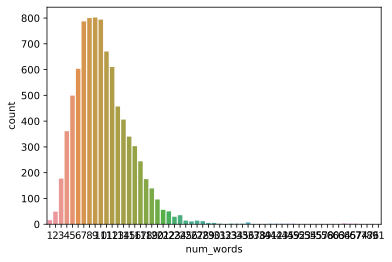

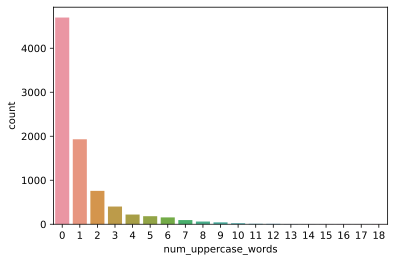

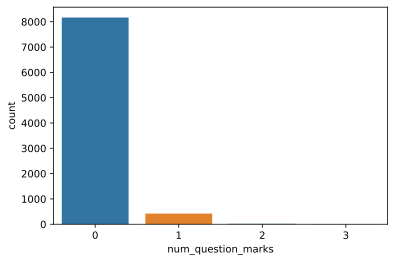

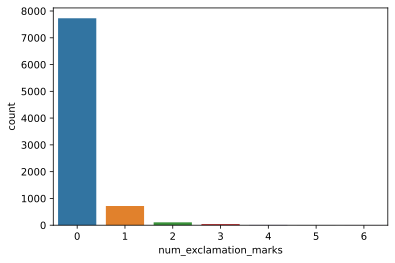

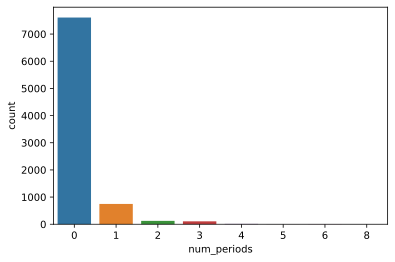

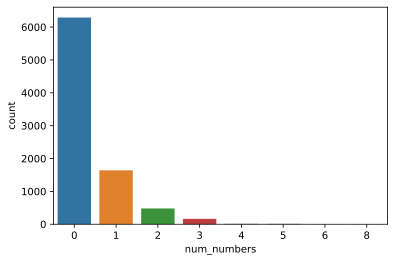

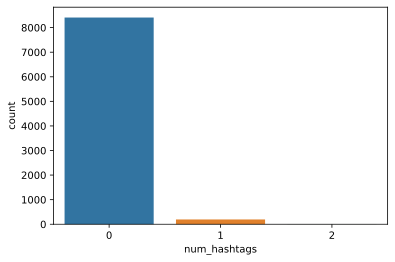

In [5]:
for func in features:
    column = func.__name__
    sns.countplot(titles[column])
    plt.show()

## Most frequent words

In [18]:
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import ngrams

stops = set(stopwords.words('english'))
stops.update(string.punctuation)
stemmer = PorterStemmer()

def most_frequent_words(phrases, ngram_size=1, num_most_common=50):
    counter = Counter()
    for phrase in phrases:
        phrase = phrase.lower()
        tokens = casual_tokenize(phrase)
        tokens = [
            stemmer.stem(token)
            for token in tokens
            if token not in stops
        ]
        if ngram_size > 1:
            tokens = ngrams(tokens, ngram_size)
        counter.update(tokens)
    return counter.most_common(num_most_common)

most_frequent_words(titles['title'])

[('offici', 738),
 ('\x80', 690),
 ('video', 530),
 ('2018', 522),
 ('trailer', 443),
 ('\x99', 332),
 ('â', 310),
 ('new', 268),
 ('2017', 255),
 ('live', 250),
 ('ì', 246),
 ('ft', 239),
 ('ë', 237),
 ('vs', 236),
 ('music', 219),
 ('star', 200),
 ('2', 194),
 ('war', 193),
 ('hd', 191),
 ('make', 186),
 ('audio', 184),
 ('first', 178),
 ('day', 175),
 ('1', 171),
 ('show', 159),
 ('game', 153),
 ('movi', 153),
 ('talk', 150),
 ('ð', 150),
 ('get', 144),
 ('last', 139),
 ('full', 136),
 ('\x9f', 129),
 ('black', 128),
 ('ã', 126),
 ('trump', 123),
 ('5', 122),
 ('\x9c', 121),
 ('\x98', 121),
 ('christma', 120),
 ('\x9d', 120),
 ('makeup', 118),
 ('best', 116),
 ('time', 114),
 ('love', 114),
 ('one', 113),
 ('tri', 113),
 ('10', 108),
 ('take', 107),
 ('3', 106)]

In [19]:
most_frequent_words(titles['title'], 2)

[(('\x80', '\x99'), 286),
 (('â', '\x80'), 251),
 (('offici', 'video'), 219),
 (('offici', 'trailer'), 189),
 (('star', 'war'), 133),
 (('music', 'video'), 133),
 (('ð', '\x9f'), 110),
 (('offici', 'music'), 108),
 (('trailer', 'hd'), 105),
 (('last', 'jedi'), 93),
 (('\x80', '\x93'), 78),
 (('lyric', 'video'), 75),
 (('offici', 'audio'), 71),
 (('super', 'bowl'), 56),
 (('ã', '\x83'), 56),
 (('\x80', '\x9c'), 55),
 (('\x80', '\x98'), 55),
 (('war', 'last'), 54),
 (('hd', 'netflix'), 53),
 (('\x80', '\x9d'), 52),
 (('cardi', 'b'), 47),
 (('black', 'panther'), 46),
 (('first', 'take'), 43),
 (('teaser', 'trailer'), 43),
 (('infin', 'war'), 41),
 (('refineri', '29'), 41),
 (('top', '10'), 40),
 (('video', 'ft'), 40),
 (('ì', '\x9d'), 39),
 (('aveng', 'infin'), 37),
 (('take', 'espn'), 37),
 (('lebron', 'jame'), 36),
 (('trailer', '1'), 35),
 (('movi', 'hd'), 34),
 (('\x80', '\x94'), 33),
 (('american', 'idol'), 32),
 (('offici', 'teaser'), 31),
 (('camila', 'cabello'), 31),
 (('justic', 

## Sentiment analysis

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def add_sentiment_scores(df, text_column):
    scores = df[text_column].apply(sid.polarity_scores)
    df['sentiment_pos'] = scores.apply(lambda d: d['pos'])
    df['sentiment_neu'] = scores.apply(lambda d: d['neu'])
    df['sentiment_neg'] = scores.apply(lambda d: d['neg'])
    df['sentiment'] = scores.apply(lambda d: d['compound'])
    return df

add_sentiment_scores(titles, 'title');

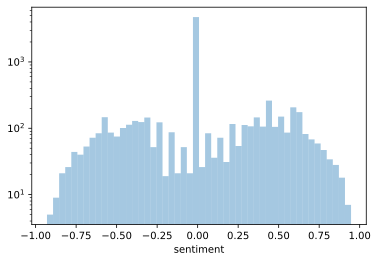

In [8]:
sns.distplot(titles['sentiment'], kde=False)
plt.yscale('log')

# Descriptions

In [32]:
descriptions = pd.DataFrame({ 'description': vids.groupby('video_id').first()['description '].dropna() })

for func in features:
    descriptions[func.__name__] = descriptions['description'].apply(func)

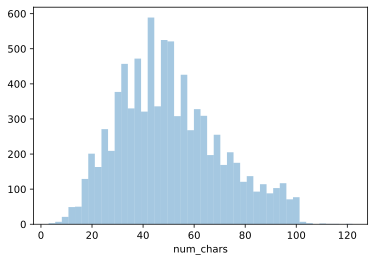

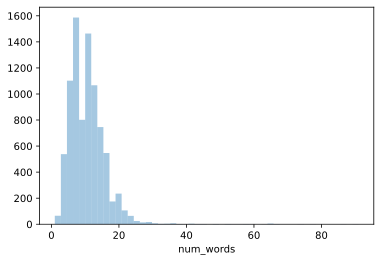

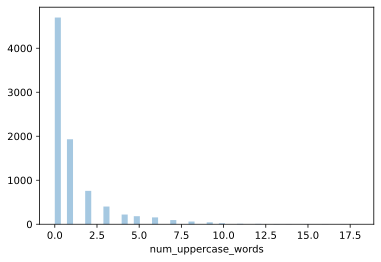

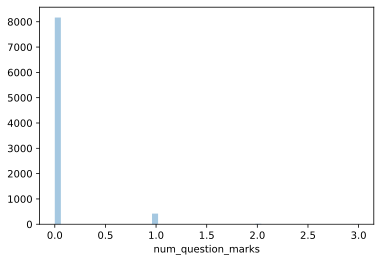

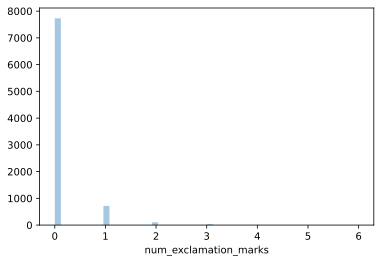

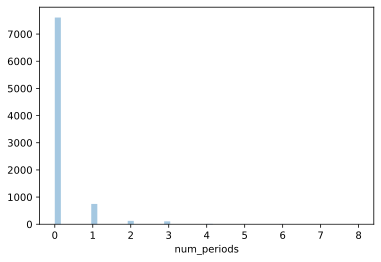

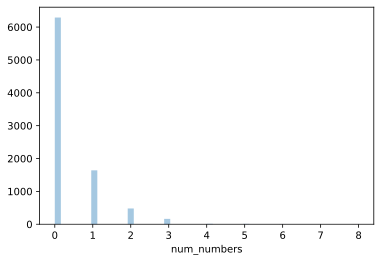

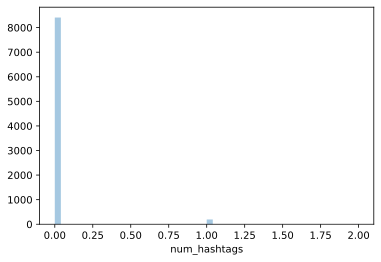

In [35]:
for func in features:
    column = func.__name__
    sns.distplot(titles[column], kde=False)
    plt.show()

## Frequent words

In [42]:
most_frequent_words(descriptions['description'])

[('â', 21466),
 ('\x80', 20166),
 ('n', 9009),
 ('\x99', 7546),
 ('video', 6582),
 ('ì', 5483),
 ('¢', 5013),
 ('\x96', 4673),
 ('\x9c', 4198),
 ('follow', 4093),
 ('\x9d', 4023),
 ('twitter', 3964),
 ('ë', 3944),
 ('subscrib', 3730),
 ('show', 3652),
 ('music', 3574),
 ('facebook', 3557),
 ('instagram', 3548),
 (':/', 3225),
 ('watch', 3214),
 ('get', 3201),
 ('us', 2930),
 ('like', 2914),
 ('new', 2871),
 ('\x94', 2782),
 ('youtub', 2554),
 ('channel', 2456),
 ('live', 2445),
 ('º', 2429),
 ('ã', 2374),
 ('nhttp', 2349),
 ('»', 2129),
 ('\x98', 2124),
 ('news', 2121),
 ('late', 2045),
 ('jimmi', 1966),
 ('\x84', 1848),
 ('use', 1829),
 ('make', 1765),
 (':\\', 1738),
 ('star', 1691),
 ('¸', 1656),
 ('\xad', 1633),
 ('one', 1625),
 ('ð', 1602),
 ('í', 1588),
 ('\x9e', 1555),
 ('\x9f', 1553),
 ('product', 1549),
 ('\x83', 1547)]

In [44]:
most_frequent_words(descriptions['description'], 2)

[(('â', '\x80'), 9999),
 (('\x80', '\x99'), 6268),
 (('\x80', '¢'), 4546),
 (('¢', 'â'), 3997),
 (('â', '\x96'), 3394),
 (('\x96', 'º'), 2418),
 (('nhttp', ':/'), 2349),
 (('\x80', '\x9d'), 2061),
 (('\x80', '\x9c'), 2017),
 (('â', '»'), 1515),
 (('â', '\xad'), 1237),
 (('ì', '\x9d'), 1176),
 (('\xad', 'â'), 1164),
 (('\x80', '\x94'), 1159),
 (('ð', '\x9f'), 1107),
 (('late', 'show'), 1065),
 (('jimmi', 'kimmel'), 994),
 (('n', 'n'), 939),
 (('»', 'â'), 866),
 (('â', '\x9e'), 816),
 (('ã', '\x83'), 805),
 (('\x80', '\x93'), 799),
 (('kimmel', 'live'), 766),
 (('tonight', 'show'), 727),
 (('late', 'night'), 701),
 (('music', 'video'), 675),
 (('\x94', 'â'), 671),
 (('â', '\x99'), 668),
 (('follow', 'us'), 645),
 (('iâ', '\x80'), 590),
 (('\x96', '¶'), 576),
 (('ã', '\x81'), 576),
 (('\x80', '\x98'), 553),
 (('ã', '\x82'), 550),
 (('í', '\x95'), 542),
 (('jimmi', 'fallon'), 540),
 (('â', '\x9c'), 494),
 (('ë', '\x8b'), 486),
 (('ì', '\x97'), 479),
 (('social', 'media'), 476),
 (('\x96', 

## Sentiment analysis

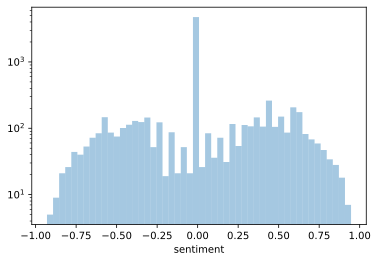

In [41]:
add_sentiment_scores(descriptions, 'description')
sns.distplot(titles['sentiment'], kde=False)
plt.yscale('log')

## tags

In [9]:
def parse_tags(value):
    if value == '[none]':
        return []
    return[tag.strip('"') for tag in value.split('|')]
